In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('results.csv',index_col=0)

In [5]:
df

,Secp256k1,l,h,FALCON512,l.1,h.1,FALCON1024,l.2,h.2,C-FALCON512,...,h.3,C-FALCON1024,l.4,h.4,pk-FALCON512,l.5,h.5,pk-FALCON1024,l.6,h.6
Key Generation,14.93,14.91,14.96,337860.000000,320760.000000,354450.000000,1.883100e+06,1.829800e+06,1.938700e+06,5204.600000,...,5386.200000,16270.000000,16070.000000,16537.000000,321600.000000,301560.000000,337170.000000,1.815500e+06,1640000.00,1950000.00
Signature Generation,22.12,22.11,22.13,573.010000,571.290000,574.990000,1.149400e+03,1.146900e+03,1.152000e+03,152.530000,...,153.070000,306.810000,306.080000,307.630000,615.450000,611.310000,619.820000,1.320100e+03,1275.90,1402.20
Signature Verification,24.12,24.06,24.19,25.970000,25.920000,26.040000,5.482000e+01,5.468000e+01,5.497000e+01,24.900000,...,24.950000,50.150000,49.690000,50.970000,74.640000,71.360000,79.640000,1.488800e+02,147.44,150.73
NaN,NaN,NaN,NaN,22623.543590,21478.505420,23734.431500,1.260948e+05,1.225258e+05,1.298179e+05,348.506763,...,360.666935,1089.460292,1076.068033,1107.338958,21534.752910,20192.848530,22577.340300,1.215682e+05,NaN,NaN
NaN,NaN,NaN,NaN,25.903440,25.825686,25.992948,5.195968e+01,5.184666e+01,5.207721e+01,6.895258,...,6.919669,13.869626,13.836626,13.906695,27.821979,27.634827,28.019529,5.967633e+01,NaN,NaN
NaN,NaN,NaN,NaN,1.076827,1.074547,1.079771,2.272980e+00,2.267217e+00,2.279158e+00,1.032215,...,1.034413,2.079357,2.059994,2.113355,3.094780,2.958539,3.301878,6.172727e+00,NaN,NaN


In [6]:
def parse_data(df: pd.DataFrame, func_string: str):
    idx_names = [0, 3, 6, 9, 12, 15, 18]
    idx_lower = [1 + i for i in idx_names]
    idx_higher = [2 + i for i in idx_names]
    categories = df.columns[idx_names]
    values = df.loc[[func_string],df.columns[idx_names]].values.tolist()[0]
    error_lower = df.loc[[func_string],df.columns[idx_lower]].values.tolist()[0]
    error_lower = [v-l for v,l in zip(values,error_lower)]
    error_higher = df.loc[[func_string],df.columns[idx_higher]].values.tolist()[0]
    error_higher = [h-v for h,v in zip(error_higher,values)]
    error = [error_lower,error_higher]
    
    return categories, values, error
    

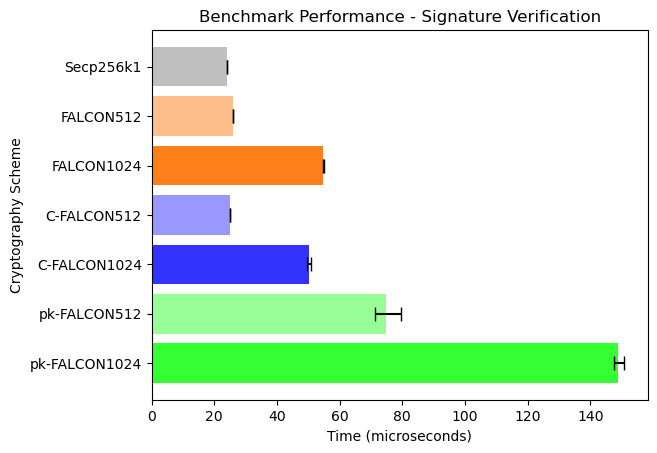

In [23]:
function_string = "Signature Verification"
categories, values, error = parse_data(df, function_string)
colors = [(0.5,0.5,0.5,0.5),
          (1,0.5,0.1,0.5),
          (1,0.5,0.1,1),
          (0.2,0.2,1,0.5),
          (0.2,0.2,1,1),
          (0.2,1,0.2,0.5),
          (0.2,1,0.2,1),]
plt.barh(categories,values,xerr=error,align='center',capsize =5, color = colors)
plt.ylabel("Cryptography Scheme")
if function_string == "Key Generation":
    plt.xscale("log")
plt.xlabel("Time (microseconds)")
plt.title(f"Benchmark Performance - {function_string}")
plt.gca().invert_yaxis()
plt.savefig(function_string+".pdf",format='pdf',bbox_inches='tight',dpi=300)
plt.show()


Memory Usage

In [90]:
df_mem = pd.read_csv("memory_usage.csv", index_col=0)
df_mem = df_mem.T
df_mem = df_mem.reset_index()
df_mem = df_mem.rename(columns = {"index": "Cryptography Scheme"})

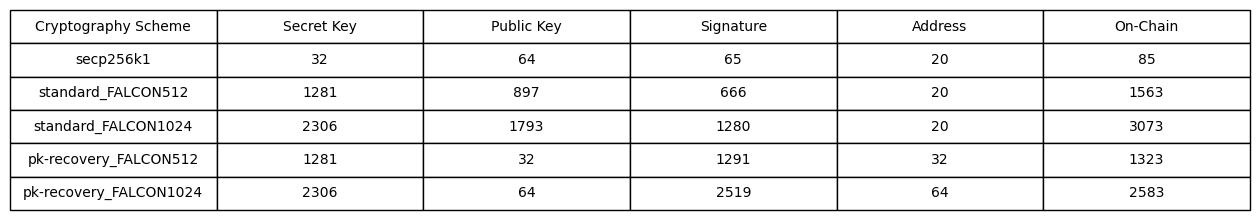

In [102]:
# Create a figure and axis
# fig, ax = plt.subplots(figsize=(8, 2))  # Adjust size as needed
fig, ax = plt.subplots(figsize=(8,2))

# Hide the axes
ax.axis('off')

# Create a table from the DataFrame
table = ax.table(
    cellText=df_mem.values,
    colLabels=df_mem.columns,
    cellLoc='center',
    loc='center'
)

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2,2)
# plt.title("Blockchain Application of Cryptographic Schemes Memory Usage")

# Save the table as an image
plt.savefig('memory_usage_table.png', bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()

In [100]:
df_gas = df_mem[["Cryptography Scheme","On-Chain"]].copy()
df_gas["Gas Estimate"] = df_gas["On-Chain"]*16
df_gas = df_gas.rename(columns={"On-Chain": "On-Chain Storage (bytes)"})

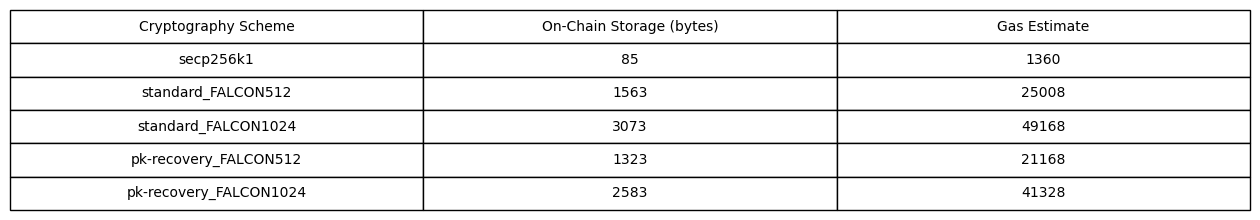

In [101]:
# Create a figure and axis
# fig, ax = plt.subplots(figsize=(8, 2))  # Adjust size as needed
fig, ax = plt.subplots(figsize=(8,2))

# Hide the axes
ax.axis('off')

# Create a table from the DataFrame
table = ax.table(
    cellText=df_gas.values,
    colLabels=df_gas.columns,
    cellLoc='center',
    loc='center'
)

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2,2)
# plt.title("Blockchain Application of Cryptographic Schemes Memory Usage")

# Save the table as an image
plt.savefig('gas_estimate_table.png', bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()

In [118]:
storage_summary = {"Ethereum Price (USD)": "2448",
 "Average Gas Cost (gwei)": "7.7",
 "Daily Txns (million)": "1.121",
 "Average Block Time (s)": "12.04",
 "Average Txns Per Block": "13",
 "Average Block Size (bytes)": "67644",
 "Average Block Size on pk-recovery_FALCON512": "83738",
"Average Cost Increase per Txn (USD)": "0.40"}

In [119]:
df_storage = pd.DataFrame(storage_summary, index=[0])
df_storage = df_storage.transpose()
df_storage = df_storage.reset_index()

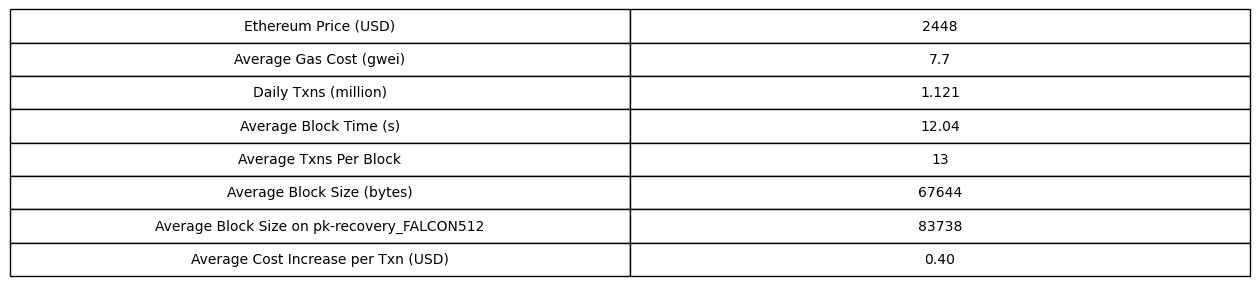

In [120]:
# Create a figure and axis
# fig, ax = plt.subplots(figsize=(8, 2))  # Adjust size as needed
fig, ax = plt.subplots(figsize=(8,2))

# Hide the axes
ax.axis('off')

# Create a table from the DataFrame
table = ax.table(
    cellText=df_storage.values,
    cellLoc='center',
    loc='center'
)

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2,2)
# plt.title("Blockchain Application of Cryptographic Schemes Memory Usage")

# Save the table as an image
plt.savefig('overall_storage_table.png', bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()